In [30]:
import numpy as np
import torch
import random
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [31]:
import zipfile

#with zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/ML Concordia/Major Assignment 1/archive.zip", "r") as zip_ref:
#    zip_ref.extractall("/content/drive/MyDrive/Colab Notebooks/ML Concordia/Major Assignment 1/archive")

In [32]:
original_dataset=ImageFolder('/content/drive/MyDrive/Colab Notebooks/ML Concordia/Major Assignment 1/archive',transforms.ToTensor()) # loads dataset from path

In [33]:
selected_samples = []
for class_label in range(len(original_dataset.classes)):
    indices = [i for i, label in enumerate(original_dataset.targets) if label == class_label]
    selected_indices = random.sample(indices, 1000)
    selected_samples.extend(selected_indices)

selected_dataset = Subset(original_dataset, selected_samples)

In [34]:
train_set,test_set=torch.utils.data.random_split(selected_dataset,[0.7,0.3]) # splits dataset into specified ratios
train_loader=DataLoader(train_set,shuffle=True,batch_size=16) # create train loader
test_loader=DataLoader(test_set,batch_size=16) # create test loader

In [35]:
torch.manual_seed(0)

model = torch.nn.Sequential(
    torch.nn.Conv2d(3,6,5),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2,2),
    torch.nn.Conv2d(6,16,5),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2,2),
    torch.nn.Flatten(),
    torch.nn.Linear(13*13*16,120),
    torch.nn.ReLU(),
    torch.nn.Linear(120,84),
    torch.nn.ReLU(),
    torch.nn.Linear(84,6),
    #torch.nn.Sigmoid()
)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [36]:
#num_epochs = 10
#train_loss = []
#test_loss = []
#for epoch in range(num_epochs):
#  running_loss = 0.0
#  for images, labels in train_loader:
#    labels_pred = model(images)                   # Make predictions (final-layer activations)
#    l = loss(labels_pred, labels)                 # Compute loss with respect to predictions
#
#    optimizer.zero_grad()                   # Reset all gradient accumulators to zero (PyTorc#h thing)
#    l.backward()                        # Compute gradient of loss wrt all parameters (backprop!)
#    optimizer.step()
#    running_loss += l.item()
#  print(epoch, "     ",running_loss)
#  train_loss.append(running_loss)

#  running_loss = 0.0
#  for images, labels in test_loader:
#    labels_pred = model(images)                   # Make predictions (final-layer activations)
#    l = loss(labels_pred, labels)                 # Compute loss with respect to predictions
#    running_loss += l.item()
#  print(epoch, "     ",running_loss)
#  test_loss.append(running_loss)

In [37]:
#plt.plot(train_loss, color='blue')
#plt.plot(test_loss, color='red')
#plt.xlabel('epochs')
#plt.ylabel('loss')
#plt.legend(['train_loss','test_loss'])
#plt.show()

In [41]:
num_epochs = 10
train_loss = []
train_accuracy = []
for epoch in range(num_epochs):
  correct = 0
  total = 0
  running_loss = 0.0
  for images, labels in train_loader:
    labels_pred = model(images)                   # Make predictions (final-layer activations)
    l = loss(labels_pred, labels)                 # Compute loss with respect to predictions

    optimizer.zero_grad()                   # Reset all gradient accumulators to zero (PyTorch thing)
    l.backward()                        # Compute gradient of loss wrt all parameters (backprop!)
    optimizer.step()
    running_loss += l.item()

    _, predicted = torch.max(labels_pred, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  print(epoch, "     ",running_loss)
  train_loss.append(running_loss)
  train_accuracy.append(100 * correct // total)labels_pred

0       458.34981644153595
1       118.21283641271293
2       47.2814434831962
3       34.76217674021609
4       32.33422047737986
5       27.114536893437617
6       21.04644062789157
7       18.074444992817007
8       13.271238508459646
9       13.314154939129367


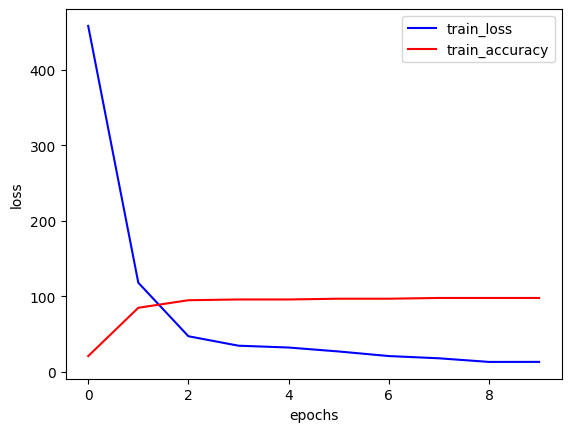

In [42]:
plt.plot(train_loss, color='blue')
plt.plot(train_accuracy, color='red')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss','train_accuracy'])
plt.show()

In [ ]:
correct = 0
total = 0
for images, labels in test_loader:
  outputs = model(images)
  # the class with the highest energy is what we choose as prediction
  _, predicted = torch.max(outputs.data, 1)
  total += labels.size(0)
  correct += (predicted == labels).sum().item()

print(f'Accuracy of the network test images: {100 * correct // total} %')

Accuracy of the network test images: 98 %


In [ ]:
#test_loader_predict = []
#test_loader_labels = []
#for images, labels in test_loader:
#  test_loader_predict.extend(model(images).detach().numpy())
#  test_loader_labels.extend(labels.numpy())

#all_predictions = np.array(test_loader_predict)
#all_labels = np.array(test_loader_labels)
#print(all_predictions[0])
#print(all_labels[0])
#report = classification_report(test_loader_predict, test_loader_labels)
#print("It is report classification on testing data:  ",report)